## Observations

1. Urban areas saw the lowest fares and the highest number of drivers which is unsurprising given the increased number of drivers in urban areas
2. Suburban areas has significantly higher fares than the other two city types which was unexpected; Given the population size of Suburban areas, I would have assumed that fares would be more comparable to Urban areas. 
3. Futher more, despite having 27% of the total rides, Suburban areas have considerably less drivers (13%) which would explain the high fares - in terms of supply/demand, there is a far higher demand for drivers in suburban areas and a much smaller supply. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
%pylab inline
import scipy, pylab

city = pd.read_csv('/Users/hanna/pyber/Pyber/raw_data/city_data.csv')
ride = pd.read_csv('/Users/hanna/pyber/Pyber/raw_data/ride_data.csv')



Populating the interactive namespace from numpy and matplotlib


In [2]:
city_ride = pd.merge(ride, city, on ='city', how='left')

city_ride_info = pd.DataFrame(city_ride.groupby(['city','driver_count','type']).fare.agg(['mean','count']).reset_index())
city_ride_info = city_ride_info.rename(columns = {'mean': 'average_fare'})
city_ride_info = city_ride_info.rename(columns = {'count': 'ride_count'})

color_city = {
        'Urban':'lightcoral',
        'Suburban':'gold',
        'Rural': 'lightskyblue'}

city_ride_info['colors'] = city_ride_info['type'].map(color_city)


In [3]:
cd = city_ride_info.to_dict()
color_result = dict(zip(cd['type'].values(), cd['colors'].values()))
list(color_result)

['Urban', 'Suburban', 'Rural']

In [4]:
city_types = city_ride_info.groupby('type')
Rural = city_types.get_group('Rural')
Suburban = city_types.get_group('Suburban')
Urban = city_types.get_group('Urban')


## Bubble Plot - Relationship between Average Fare, Total Rides, Total Drivers and City Type

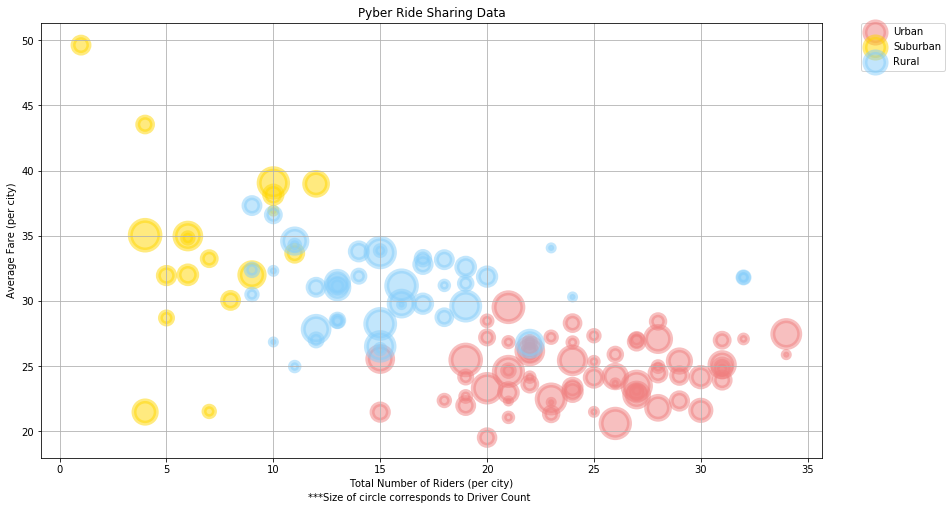

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
txt = "***Size of circle corresponds to Driver Count***"

ax1.scatter(Urban.ride_count, Urban.average_fare,s=city_ride_info.driver_count*12, c='lightcoral', alpha = 0.5, linewidth = 5)
ax1.scatter(Rural.ride_count, Rural.average_fare,s=city_ride_info.driver_count*12, c='gold', alpha = 0.5, linewidth = 5)
ax1.scatter(Suburban.ride_count, Suburban.average_fare, s=city_ride_info.driver_count*12, c='lightskyblue', alpha = 0.5, linewidth = 5)

plt.xlabel("Total Number of Riders (per city)")
plt.ylabel("Average Fare (per city)")
plt.title("Pyber Ride Sharing Data")


plt.legend((list(color_result)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

pylab.rcParams['figure.figsize'] = (14, 8)

fig.text(.5, .05, txt, ha='center')

plt.show()


## Pie Chart - % Total Fares by City Type 

In [45]:
ride.groupby(['city']).fare.agg(['count','sum']).reset_index()
total_ride_fare = ride.fare.sum()

total_fares = pd.DataFrame(city_ride.groupby(['type']).fare.agg(['sum']).reset_index())
total_fares = total_fares.rename(columns = {'sum': 'Fares'})
total_fares['Percent of Total'] = total_fares['Fares']/total_ride_fare*100
total_fares

,type,Fares,Percent of Total
0,Rural,4255.09,6.68500
1,Suburban,20335.69,31.94858
2,Urban,40078.34,62.96546


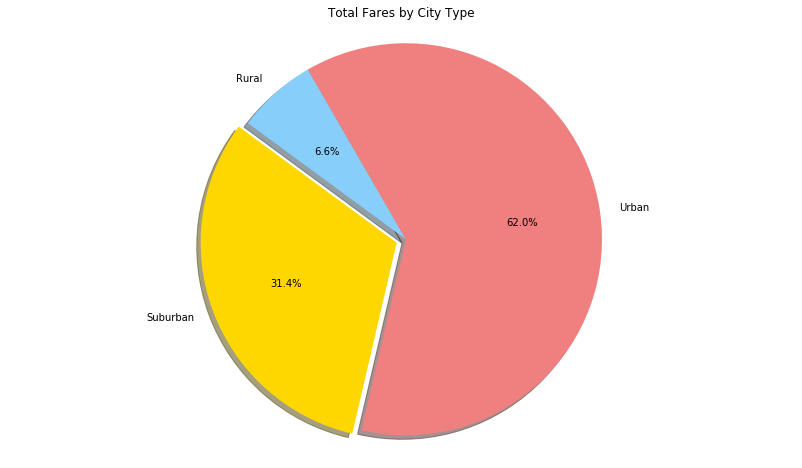

In [46]:
colors = ["lightskyblue", "gold", "lightcoral"]
explode = (0, 0.05, 0)

plt.title("Total Fares by City Type")
plt.pie(total_fares['Percent of Total'], explode=explode, labels=total_fares['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

## Pie Chart - % Total Rides by City Type

In [47]:
city_ride.groupby(['city','type']).fare.agg(['count']).reset_index()
total_city_rides = city_ride.fare.count()

total_rides = pd.DataFrame(city_ride.groupby(['type']).fare.agg(['count']).reset_index())
total_rides = total_rides.rename(columns = {'count': 'Rides'})
total_rides['Percent of Total'] = total_rides['Rides']/total_city_rides*100
total_rides

,type,Rides,Percent of Total
0,Rural,125,5.193187
1,Suburban,657,27.295388
2,Urban,1625,67.511425


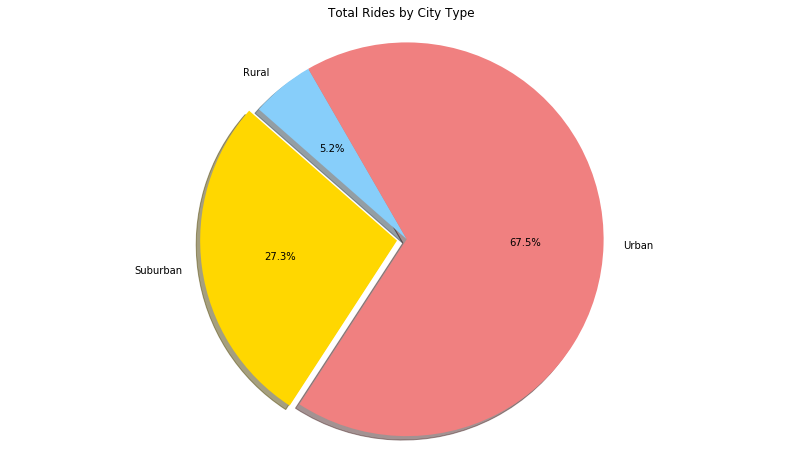

In [48]:
plt.title("Total Rides by City Type")
plt.pie(total_rides['Percent of Total'], explode=explode, labels=total_rides['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

##  Pie Chart - % Total Drivers by City Type 

In [50]:
total_city_drivers = city_ride.driver_count.sum()

total_driver = pd.DataFrame(city_ride.groupby(['type']).driver_count.agg(['sum']).reset_index())
total_driver = total_driver.rename(columns = {'sum': 'Drivers'})
total_driver['Percent of Total'] = total_driver['Drivers']/total_city_drivers*100
total_driver

,type,Drivers,Percent of Total
0,Rural,727,0.969876
1,Suburban,9730,12.980602
2,Urban,64501,86.049521


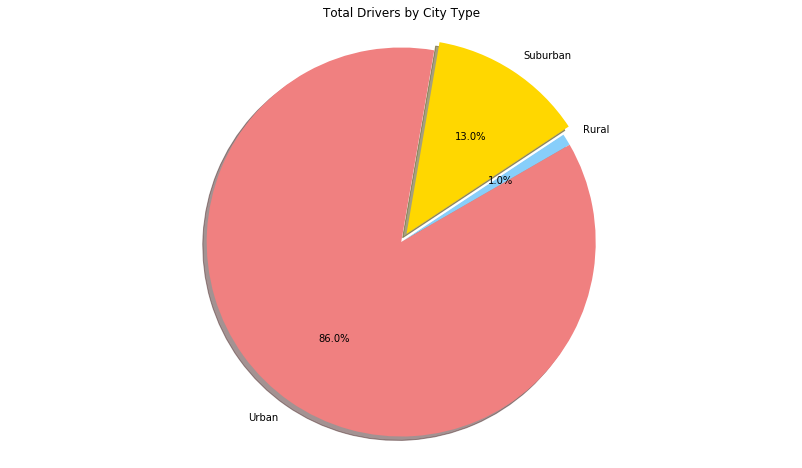

In [51]:
plt.title("Total Drivers by City Type")
plt.pie(total_driver['Percent of Total'], explode=explode, labels=total_driver['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=30)
plt.axis("equal")
plt.show()